## Introduction

In this mission, we are going to learn about **decorators**, a powerful way of modifying the behavior of functions.

Before we define what a decorator is, let's start by illustrating what decoractors can do. First, let's look at the `multiply()` function below, which multiplies two numbers together:

In [1]:
def multiply(a, b):
    return a * b

multiply(1, 5)

5

When we call multiply(1,5), 5 is returned, because 1 multiplied by 5 equals 5.

Next, let's look at what happens when we use the `double_args` decorator like below. When we use decorators, we type the `@` symbol followed by the decorator's name on the line directly above the function.

In [ ]:
@double_args
def multiply(a, b):
    return a * b

multiply(1, 5)   # -> 20

We get a different result! Why? Because double_args modifies the behavior of the `multiply()` function - double_args actually multiplies every argument by two before passing them to the `mulitply()` function. So, 1 multiplied by 5 becomes 2 multiplied by `10`, which equals `20`.

It seems kind of magical that we can alter the behavior of functions in this way, so before we learn more about decorators, we'll discuss some foundational concepts that will make them easier to understand. In order to work, decorators have to make use of the following concepts:

- Functions as objects
- Nested functions
- Nonlocal scope
- Closures

If you haven't seen some these terms before, don't worry! We'll review each concept throughout this mission as we build our intuition around decorators.

### Functions as objects

First, in order to understand decorators, it's important to remember that functions are just like any other object in Python. Functions are not fundamentally different from lists, dictionaries, DataFrames, strings, integers, floats, modules, or anything else in Python.

- **Functions as objects**
- Nested functions
- Nonlocal scope
- Closures

Because functions are just another type of object, we can do anything to or with them that we would do with any other kind of object. We can take a function and assign it to a variable, like x.

In [3]:
def my_function():
    print('Hello')
    
x = my_function
type(x)

function

In [4]:
x()

Hello


We can also add functions to a list or dictionary. Below, we've added the functions my_function(), open(), and print() to the list list_of_functions. Then we called the third element of the list, passing it a string. Since the third element of the list is the print() function, it prints that string to the console.

In [5]:
list_of_functions = [my_function, open, print]
list_of_functions[2]('I am printing with an element of a list!')

I am printing with an element of a list!


Recall that when we assign a function to a variable, we do not include the parentheses after the function name. This is a subtle but very important distinction. When we type my_function() with the parentheses, we are calling that function. It evaluates to the value that the function returns.

## Nested functions

Now that we understand how Python treats functions as objects, let's look at another concept important for understanding decorators - nested functions:

- Functions as objects
- **Nested functions**
- Nonlocal scope
- Closures

Functions defined inside other functions are called **nested functions**, although you may also hear them called inner functions, helper functions, or child functions.

A nested function can make our code easier to read. In the example below, if `x` and `y` are within some bounds, `foo()` prints `x` times `y`.

In [6]:
def foo(x, y):
    if x > 4 and x < 10 and y > 4 and y < 10:
        print(x * y)

We can make that if statement easier to read by defining an in_range() function.

In [7]:
def foo(x, y):
    def in_range(v):
        return v > 4 and v < 10

    if in_range(x) and in_range(y):
        print(x * y)

There's also nothing stopping us from returning a function. For instance, the function get_function() creates a new function, print_me(), and then returns it.

In [8]:
def get_function():
    def print_me(s):
        print(s)

    return print_me

If we assign the result of calling get_function() to the variable new_func, we are assigning the return value, print_me() to new_func. We can then call new_func() as if it were the print_me() function.

In [9]:
new_func = get_function()
new_func('This is a sentence.')

This is a sentence.


### Scope

Before we can dig into decorators, we must also understand how scope works in Python:

- Functions as objects
- Nested functions
- **Nonlocal scope**
- Closures

**Scope** determines which variables can be accessed at different points in our code.

Names are very useful things, both in Python and in the real world. For instance, this is Tom.

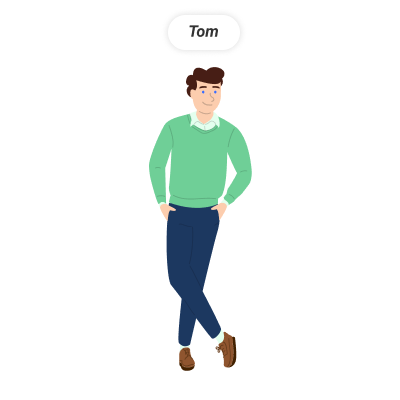

And this is Janelle.

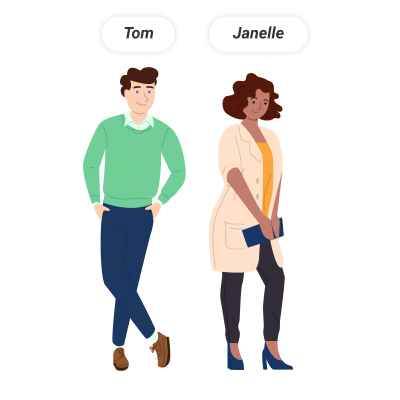

When we say "Tom" we know we are talking about the person on the left, and when we say "Janelle" we know we are talking about the person on the right.

If Janelle says, "Tom didn't go to work yesterday," we can be fairly sure she is talking about the Tom standing next to her, and not some Tom in a different country.

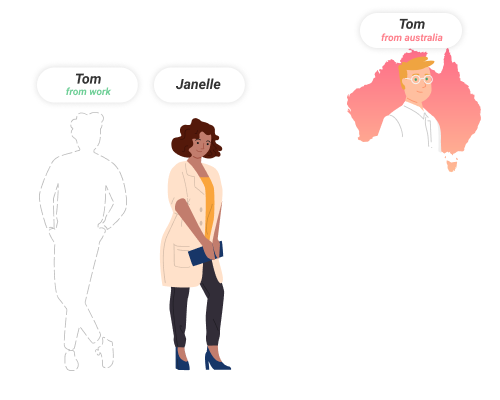

This is sort of how scope works in programming languages like Python.

Python has names too - variable names. When we say print(x) here, Python knows we mean the x that we just defined.

In [10]:
x = 7
y = 200
print(x)

7


What happens if we redefine x inside the function foo() though? In foo()'s print() statement, do we mean the x that equals 42 or the x that equals 7?

In [11]:
x = 7
y = 200
def foo():
    x = 42
    print(x)
    print(y)

foo()

42
200


Python applies the same logic we applied with Tom and Janelle, and assumes we mean the x that was defined right there in the function. However, there is no y defined in the function foo(), so it looks outside the function for a definition when asked to print y.

### Local vs global scope

In the last exercise, we saw that setting `x` equal to `42` inside the function `foo()` doesn't change the value of `x` that we set earlier outside of the function.

Python has to have strict rules about which variable we are referring to when using a particular variable name. So when we type `print(x)` in the function foo() below, the interpreter has to follow these rules to determine which x we mean.

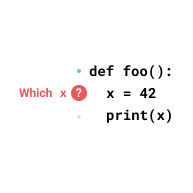

First the interpreter looks in the local scope. When we are inside a function, the local scope is made up of the arguments and any variables defined inside the function.

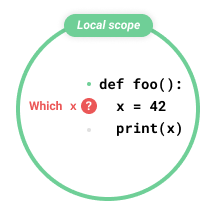

If the interpreter can't find the variable in the local scope, it expands its search to the global scope. These are the things defined outside the function.

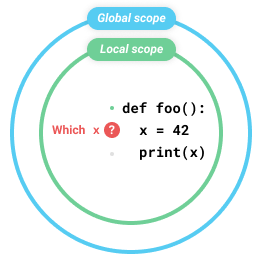

Finally, if it can't find the thing it is looking for in the global scope, the interpreter checks the builtin scope. These are things that are always available in Python. For instance, the print() function is in the builtin scope, which is why we are able to use it in our foo() function.

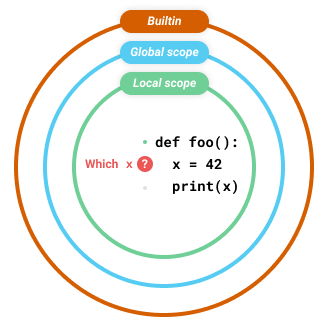

We actually skipped a level in that diagram. In the case of nested functions, where one function is defined inside another function, Python will check the scope of the parent function before checking the global scope. This is called the **nonlocal scope** to show that it is not the local scope of the child function and not the global scope.

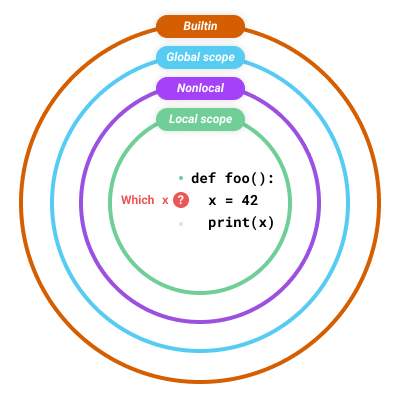

If we ever want to modify a variable that is defined in the nonlocal scope, we have to use the nonlocal keyword. It works exactly the same as the global keyword but it is used when we are inside a nested function and want to update a variable that is defined inside our parent function.

In [12]:
def foo():
    x = 10

    def bar():
        x = 200
        print(x)

    bar()
    print(x)

foo()

200
10


In [13]:
def foo():
    x = 10

    def bar():
        nonlocal x
        x = 200
        print(x)

    bar()
    print(x)

foo()

200
200


### Closures

The last topic we need to understand before discussing decorators is how closures work in Python.

- Functions as objects
- Nested functions
- Nonlocal scope
- Closures

A closure in Python is a tuple of variables that are no longer in scope, but that a function needs in order to run. Let's explain this with an example.

The function foo() defines a nested function bar() that prints the value of a.

In [14]:
def foo():
    a = 5
    def bar():
        print(a)
    return bar

func = foo()

`foo()` returns this new function, so when we say `func = foo()` we are assigning the `bar()` function to the variable `func`. Now what happens when we call `func()`?

In [15]:
func()

5


As expected, it prints the value of variable a, which is 5. But, how does func() know anything about variable a? a is defined in foo()'s scope, not bar()'s.

That's where closures come in. When foo() returned the new bar() function, Python helpfully attached any nonlocal variable that bar() was going to need to the function object. Those variables get stored in a tuple in the __closure__ attribute of the function.

In [24]:
func.__closure__

(<cell at 0x000001DACE83B2B0: int object at 0x00007FFC70E227A0>,)

In [18]:
len(func.__closure__)

1

Above, we can see that the closure for func has one variable. We can view the value of that variable by accessing the cell_contents of the item.

In [25]:
func.__closure__[0].cell_contents

5

 Next, let's examine this bit of code.

In [26]:
x = 25

def foo(value):
    def bar():
        print(value)
    return bar

my_func = foo(x)
my_func()

25


Here, x is defined in the global scope. `foo()` creates a function `bar()` that prints whatever argument was passed to `foo()`. When we call `foo()` and assign the result to `my_func`, we pass in `x`. So, as expected, calling `my_func()` prints the value of x.

Now let's delete x and call my_func() again. What do you think will happen this time?

In [27]:
del(x)
my_func()

25


If you guessed that we would still print 25, then you are correct. That's because foo()'s value argument gets added to the closure attached to the new my_func function. So even though x doesn't exist anymore, the value persists in its closure.

In [28]:
len(my_func.__closure__)

1

In [29]:
my_func.__closure__[0].cell_contents

25

Notice that nothing changes if we overwrite x instead of deleting it. Here we've passed x into foo() and then assigned the new function to the variable x.

In [30]:
x = 25

def foo(value):
    def bar():
        print(value)
    return bar

x = foo(x)
x()

25


The old value of x, 25, is still stored in the new function's closure, even though the new function is now stored in the x variable

In [31]:
len(x.__closure__)

1

In [32]:
x.__closure__[0].cell_contents

25

### Introduction to Decorators

Before we move on, let's review the key concepts we've learned so far.

- **Functions as objects**: Because functions are objects, they can be passed around as variables.
- **Nested functions**: A function defined inside another function.
- **Nonlocal variables**: Variables defined in the parent function that are used by the child function.
- **Closures**: Nonlocal variables attached to a returned function.

Now that we know functions can be passed around as variables, and we understand scope and closures, we can talk about decorators.

So, finally, what is a decorator? Let's say we have a function that takes some inputs and returns some outputs.

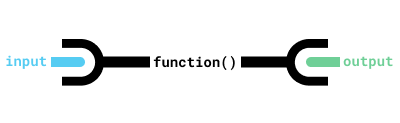

A decorator is a **wrapper** that we can place around a function that changes that function's behavior.

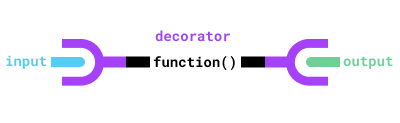


We can modify the inputs,

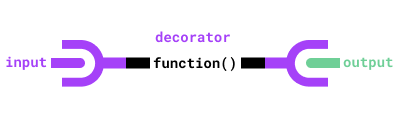


modify the outputs,

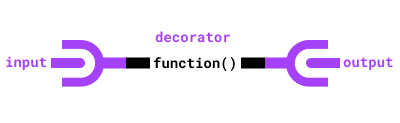

or even change the behavior of the function itself.

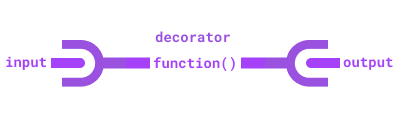

In short, **decorators are functions that take a function as an argument and return a modified version of that function.**

### Decorators

Let's return to the `double_args` decorator we reviewed at the beginning of this mission:


```
@double_args
def multiply(a, b):
    return a * b
```

```
multiply(1, 5) # -> 20
```` 

Recall that the double_args decorator multiplies every argument by two before passing them to the decorated function. So 1 times 5 becomes 2 times 10, which equals 20. Let's dig deeper into how this works next.

To start off, let's not have `double_args` modify anything. It just takes a function and immediately returns it.

In [33]:
def multiply(a, b):
    return a * b

In [34]:
def double_args(func):
    return func

Let's call this version of `double_args()` that does nothing and pass it the `multiply()` function. Then, let's assign the result to the variable `new_multiply`.

In [35]:
new_multiply = double_args(multiply)

When we call new_multiply(1, 5), we get the same value we would have gotten from multiply(1, 5).

In [39]:
new_multiply(1, 5)

5

In [40]:
multiply(1, 5)

5

In order for our decorator to return a modified function, it is usually helpful for it to define a new function to return. We'll call that nested function wrapper(). All wrapper() does is take two arguments and passes them on to whatever function was passed to double_args() in the first place.

In [41]:
def double_args(func):
    # Define a new function that we can modify
    def wrapper(a, b):
        # For now, just call the unmodified function
        return func(a, b)
    # Return the new function
    return wrapper

If `double_args()` then returns the new `wrapper()` function, the return value acts exactly the same as whatever function was passed to `double_args()` (assuming that the function passed to double_args() also takes exactly two arguments).

Once again, we'll pass `multiply()` to `double_args()` and assign the result to `new_multiply()`.

In [42]:
new_multiply = double_args(multiply)

If we then call new_multiply(), which is now equal to the wrapper() function, wrapper() calls multiply() because it is the function that was passed to double_args().

In [43]:
new_multiply(1, 5)

5

So wrapper() calls multiply() with the arguments 1 and 5, which returns 5. We can see that double_args() is still not doing anything to actually modify the function it is decorating.

Next, let's modify the function our decorator is decorating.

- Modify the nested function, wrapper(), so that when it calls func, it doubles each argument.
- Call double_args() on the multiply() function and assign the result to new_multiply().
- Call new_multiply() with 1 and 5 as arguments.

In [44]:
def multiply(a, b):
    return a * b

def double_args(func):
    def wrapper(a, b):
        # Call the passed in function, but double each argument
        return func(2*a, 2*b)
    return wrapper

new_multiply = double_args(multiply)
new_multiply(1,5)

20

We're almost there. This time, instead of assigning the new function to `new_multiply`, we're going to overwrite the `multiply` variable.

In [46]:
def multiply(a, b):
    return a * b

def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

multiply = double_args(multiply)

Now calling multiply() with arguments 1 and 5 gives us 20 instead of 10.

In [47]:
multiply(1, 5)

20

Remember that we can do this because Python stores the original multiply function in the new function's closure.

In [48]:
multiply.__closure__[0].cell_contents

<function __main__.multiply(a, b)>

When we first looked at the `double_args()` decorator at the beginning of this mission, we used `@double_args` on the line before the definition of `multiply()`. This is just a Python convenience for saying `multiply` equals the value returned by calling `double_args()` with multiply as the only argument.

The code shown here on the left is exactly equivalent to the code on the right.


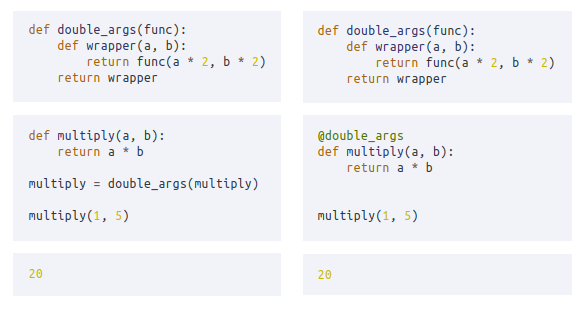

You have written a decorator called print_args that prints out all of the arguments and their values any time a function that it is decorating gets called.

- Decorate my_function() with the print_args() decorator using decorator syntax. Call my_function() with a=1, b=2, and c=3 as the arguments.

In [53]:
import inspect

def print_args(func):
    sig = inspect.signature(func)
    def wrapper(*args, **kwargs):
        bound = sig.bind(*args, **kwargs).arguments
        str_args = ', '.join(['{}={}'.format(k, v) for k, v in bound.items()])
        print('{} was called with {}'.format(func.__name__, str_args))
        return func(*args, **kwargs)
    return wrapper

@print_args
def my_function(a, b, c):
    print(a + b + c)
    
my_function(a=1, b=2, c=3)

my_function was called with a=1, b=2, c=3
6
